xd

In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

Iniciamos creando la grilla del módelo

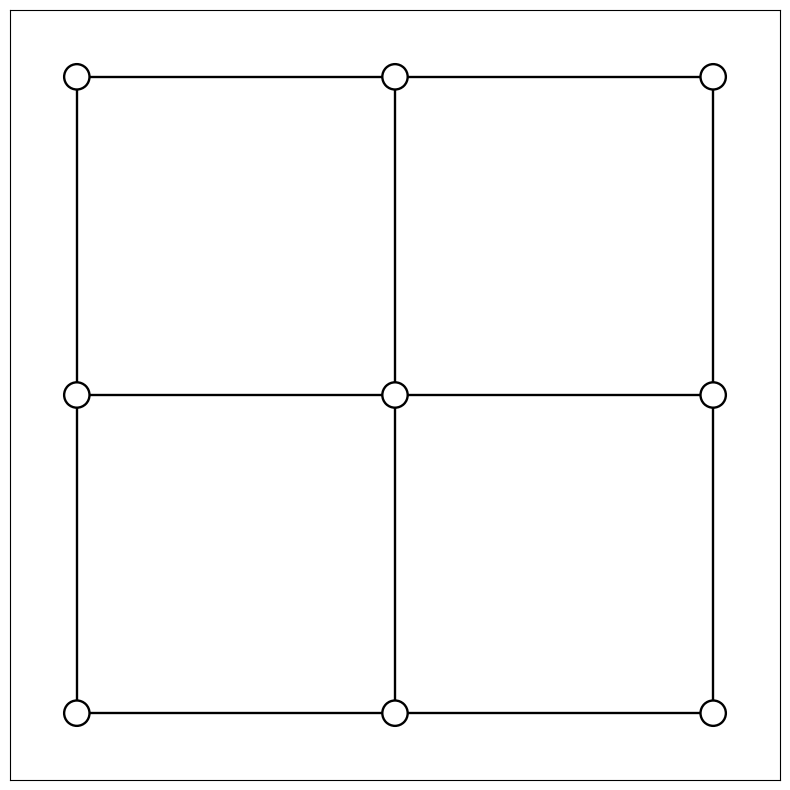

In [2]:
def restart_G(k):
    # Create a lattice, kxk graph
    G = nx.grid_2d_graph(k, k)

    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    # Color of the nodes
    color_values = {node: "white" for i, node in enumerate(G.nodes())}
    return G, color_values

    
def plot_grid(color_values):
    # Define the positions for plotting
    pos = {(x, y): (y, -x) for x, y in G.nodes()}
    
    ## Plot the graph
    options = {
        "font_size": 200,
        "node_size": 1000/k,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1.7,
        "width": 1.7,
        "with_labels": False,
        "node_color": color_values.values(),
    }

    plt.figure(figsize=(8, 8))
    nx.draw_networkx(G, pos=pos, **options)
    plt.tight_layout()
    plt.show()
    
    

k = 3

    
# Iniciar el valor de los colores
G, color_values = restart_G(k)  

# Graficar la grilla
plot_grid(color_values)

Definimos la función que actualiza el sistema en un único paso; es decir, pasa de $X_n$  a $X_{n+1}$ 

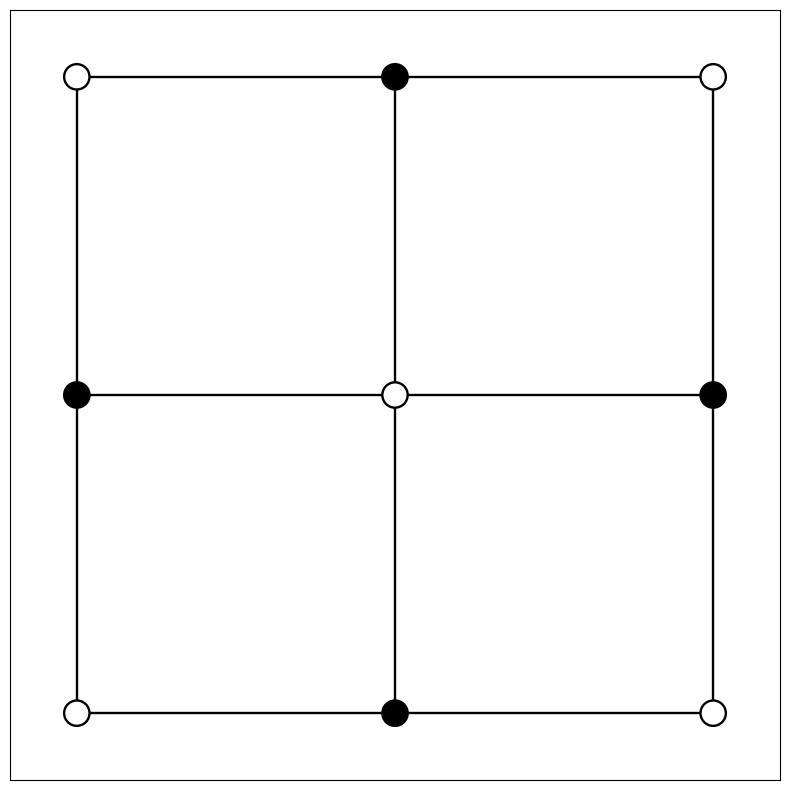

In [6]:
def step():
    # Elegir un nodo al azar con distribución uniforme https://docs.python.org/3/library/random.html
    x = random.choice(range(0,k))
    y = random.choice(range(0,k))


    coin = random.choice(("cara", "sello"))

    if coin == "cara":
        movimiento_legal = True
        vecinos_list = [n for n in G.neighbors((x,y))]
        for vecino in vecinos_list:
            if color_values[vecino] != "white":
                movimiento_legal = False


        if movimiento_legal:
            color_values[(x,y)] = "black"

        else:
            color_values[(x,y)] = "white"
    else:
        color_values[(x,y)] = "white"


step()

plot_grid(color_values)

## 2. Distribución del número de partículas 


Hacemos el proceso de evolución muchas veces

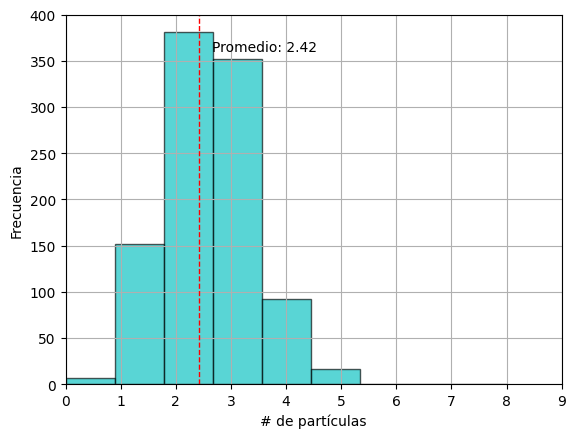

In [7]:
def count_particles(color_values):
    counter = 0
    colores_list = list(color_values.values())
    for color in colores_list:
        if color == "black":
            counter += 1
            
    return counter
    
    
def find_evolution(n):
    for ii in range(n):
        step()
    
    
def find_expected_value(particle_distribution, n_repetitions):
    suma = 0
    x_vector = list(particle_distribution.keys())
    y_vector = list(particle_distribution.values())
    for ii in range(len(particle_distribution)):
        suma += x_vector[ii] * y_vector[ii]
        
    return suma/n_repetitions
        
    
k = 3
n_repetitions = 1000

particle_distribution = {i: 0 for i in range(k*k)}
for ii in range (n_repetitions):
    ## Reiniciar los valores de G    
    G, color_values = restart_G(k)
    
        ## Hacer una evolución de muchos pasos
    find_evolution(10000)
    
    
    ## Contar cuántas partículas hay
    particulas = count_particles(color_values)
       
    
    ## Añadir el resultado a la distribución
    particle_distribution[particulas] += 1
    

    
    
## Plot of histogram
average = find_expected_value(particle_distribution, n_repetitions)
keys = list(particle_distribution.keys())
values = list(particle_distribution.values())


plt.hist(keys, bins=len(keys), weights=values, color='c', edgecolor='k', alpha=0.65)
plt.axvline(average, color='r', linestyle='dashed', linewidth=1, label="Promedio")
plt.text(average*1.1, plt.ylim()[1]*0.9, 'Promedio: {:.2f}'.format(average))
plt.xlabel("# de partículas")
plt.ylabel("Frecuencia")
plt.xlim(0, k**2)
plt.grid()
plt.show()